In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [137]:
import pandas as pd

# Load the data
forex_data = pd.read_csv("C:/Users/krake/OneDrive/Documents/rakesh profile/combined_currency_data.csv")
economic_factors = pd.read_csv("C:/Users/krake/OneDrive/Documents/rakesh profile/combined_financial_data.csv")

# Display the column names
print("Forex Data Columns:", forex_data.columns)
print("Economic Factors Columns:", economic_factors.columns)

Forex Data Columns: Index(['Date', 'AUD_USD', 'EUR_USD', 'NZD_USD', 'GBP_USD', 'BRL_USD',
       'CAD_USD', 'CNY_USD', 'HKD_USD', 'INR_USD', 'KRW_USD', 'MXN_USD',
       'ZAR_USD', 'SGD_USD', 'DKK_USD', 'JPY_USD', 'MYR_USD', 'NOK_USD',
       'SEK_USD', 'LKR_USD', 'CHF_USD', 'TWD_USD', 'THB_USD'],
      dtype='object')
Economic Factors Columns: Index(['Date', 'gold', 'crude_oil', 'inflation'], dtype='object')


In [138]:
forex_data = pd.read_csv("C:/Users/krake/OneDrive/Documents/rakesh profile/combined_currency_data.csv")
economic_factors = pd.read_csv("C:/Users/krake/OneDrive/Documents/rakesh profile/combined_financial_data.csv")
merged_data = pd.merge(forex_data, economic_factors, on='Date', how='inner')
merged_data.dropna(subset=['INR_USD', 'gold', 'crude_oil', 'inflation'], inplace=True)

In [139]:
columns = merged_data.columns
print(columns)

Index(['Date', 'AUD_USD', 'EUR_USD', 'NZD_USD', 'GBP_USD', 'BRL_USD',
       'CAD_USD', 'CNY_USD', 'HKD_USD', 'INR_USD', 'KRW_USD', 'MXN_USD',
       'ZAR_USD', 'SGD_USD', 'DKK_USD', 'JPY_USD', 'MYR_USD', 'NOK_USD',
       'SEK_USD', 'LKR_USD', 'CHF_USD', 'TWD_USD', 'THB_USD', 'gold',
       'crude_oil', 'inflation'],
      dtype='object')


In [140]:
merged_data = merged_data.drop(columns=['Unnamed: 0'], errors='ignore')

In [200]:
import pandas as pd

# Load and merge data
forex_data = pd.read_csv("C:/Users/krake/OneDrive/Documents/rakesh profile/combined_currency_data.csv")
economic_factors = pd.read_csv("C:/Users/krake/OneDrive/Documents/rakesh profile/combined_financial_data.csv")
merged_data = pd.merge(forex_data, economic_factors, on='Date', how='inner')
merged_data.dropna(subset=['INR_USD', 'gold', 'crude_oil', 'inflation'], inplace=True)


features = ['gold', 'crude_oil', 'inflation']
target = 'INR_USD'
# Calculate correlations
correlation_matrix = merged_data[['INR_USD'] + features].corr()
print(correlation_matrix)


            INR_USD      gold  crude_oil  inflation
INR_USD    1.000000  0.842632   0.184286   0.674714
gold       0.842632  1.000000   0.300146   0.404877
crude_oil  0.184286  0.300146   1.000000   0.269505
inflation  0.674714  0.404877   0.269505   1.000000


In [203]:


# Summary statistics for a specific column
print(merged_data['crude_oil'].describe())

count    2510.000000
mean       63.731466
std        20.437437
min       -37.630001
25%        48.520000
50%        59.660000
75%        76.675001
max       123.699997
Name: crude_oil, dtype: float64


In [209]:
# Initialize an empty dictionary to store outliers
outliers_iqr = {}

# Calculate outliers using IQR for each numeric column
for col in numeric_columns:
    Q1 = merged_data[col].dropna().quantile(0.25)
    Q3 = merged_data[col].dropna().quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[col] = merged_data[(merged_data[col] < lower_bound) | (merged_data[col] > upper_bound)]

# Print outliers
for col, outliers in outliers_iqr.items():
    print(f"Outliers based on IQR for {col}:")
    print(outliers)

Outliers based on IQR for AUD_USD:
            Date   AUD_USD   EUR_USD   NZD_USD   GBP_USD   BRL_USD  CAD_USD  \
0     2014-01-02  0.889205  1.376671  0.820883  1.658072  2.357100  1.06445   
1     2014-01-03  0.890631  1.366662  0.818733  1.644791  2.384700  1.06691   
2     2014-01-06  0.896539  1.359601  0.826720  1.641309  2.371500  1.06305   
3     2014-01-07  0.896700  1.363196  0.828981  1.641794  2.373700  1.06609   
4     2014-01-08  0.891742  1.361637  0.828226  1.640016  2.368700  1.07730   
...          ...       ...       ...       ...       ...       ...      ...   
209   2014-10-30  0.876808  1.263280  0.778331  1.600563  2.457800  1.11910   
210   2014-10-31  0.882457  1.261336  0.784191  1.600102  2.401600  1.11940   
1559  2020-03-19  0.580980  1.096155  0.573069  1.162534  5.103962  1.44450   
1560  2020-03-20  0.574290  1.065735  0.568476  1.149439  5.094200  1.44982   
1561  2020-03-23  0.575331  1.069439  0.562610  1.162304  5.045500  1.44594   

      CNY_USD  H

In [210]:
from scipy import stats

# Initialize an empty dictionary to store outliers
outliers_z = {}

# Calculate outliers using Z-score for each numeric column
for col in numeric_columns:
    z_scores = stats.zscore(merged_data[col].dropna())
    outliers_z[col] = merged_data[col].dropna()[abs(z_scores) > 3]

# Print outliers
for col, outliers in outliers_z.items():
    print(f"Outliers based on Z-score for {col}:")
    print(outliers)


Outliers based on Z-score for AUD_USD:
125    0.949217
Name: AUD_USD, dtype: float64
Outliers based on Z-score for EUR_USD:
48    1.390453
50    1.391304
51    1.392661
52    1.393088
69    1.388638
86    1.393068
87    1.391169
Name: EUR_USD, dtype: float64
Outliers based on Z-score for NZD_USD:
130    0.882379
131    0.881213
132    0.881135
133    0.881213
Name: NZD_USD, dtype: float64
Outliers based on Z-score for GBP_USD:
Series([], Name: GBP_USD, dtype: float64)
Outliers based on Z-score for BRL_USD:
Series([], Name: BRL_USD, dtype: float64)
Outliers based on Z-score for CAD_USD:
Series([], Name: CAD_USD, dtype: float64)
Outliers based on Z-score for CNY_USD:
Series([], Name: CNY_USD, dtype: float64)
Outliers based on Z-score for HKD_USD:
Series([], Name: HKD_USD, dtype: float64)
Outliers based on Z-score for INR_USD:
Series([], Name: INR_USD, dtype: float64)
Outliers based on Z-score for KRW_USD:
2194    1421.810059
2195    1429.770020
2196    1426.260010
2197    1421.949951
219

In [212]:
import pandas as pd
from scipy import stats


# Initialize a DataFrame to store the cleaned data
cleaned_df = merged_data.copy()

# Calculate Z-scores and remove outliers for each numeric column
for col in cleaned_df.select_dtypes(include=['number']).columns:
    # Calculate Z-scores
    z_scores = stats.zscore(cleaned_df[col].dropna())
    abs_z_scores = abs(z_scores)
    
    # Filter out the outliers
    # Use the index to apply the mask correctly to the DataFrame
    cleaned_df = cleaned_df[(abs_z_scores <= 3) | cleaned_df[col].isna()]

# Save the cleaned data to a new CSV file
cleaned_df.to_csv("C:/Users/krake/OneDrive/Documents/rakesh profile/cleaned_data_zscore.csv", index=False)


In [213]:
# Summary statistics for a specific column
print(merged_data['inflation'].describe())

count    2510.000000
mean        1.262788
std         1.582762
min        -0.105000
25%         0.045000
50%         0.481500
75%         1.960000
max         5.348000
Name: inflation, dtype: float64


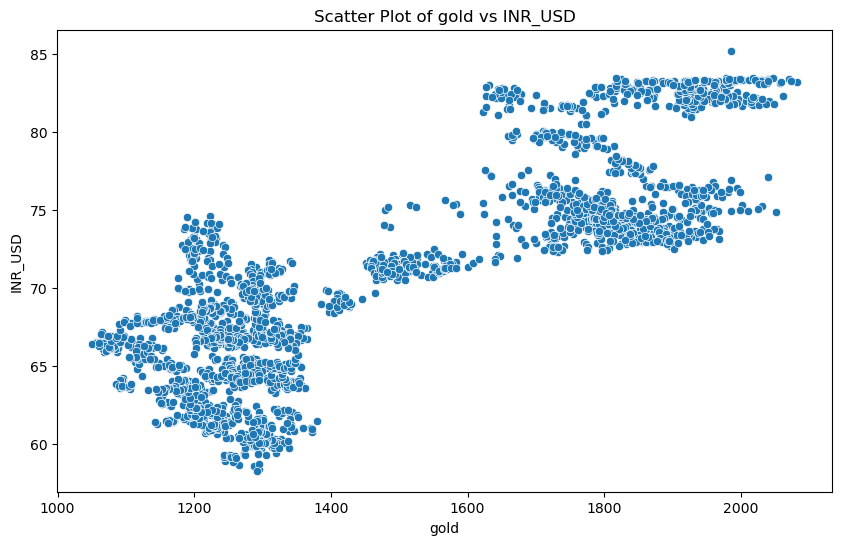

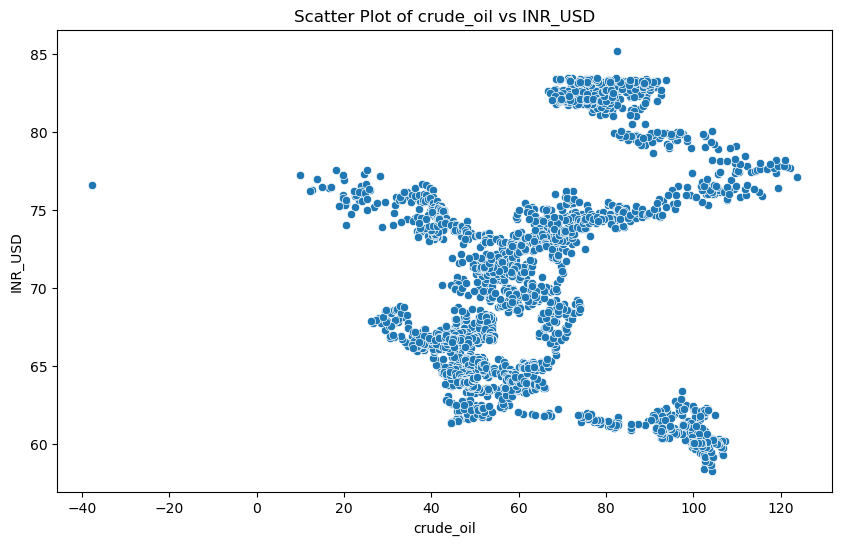

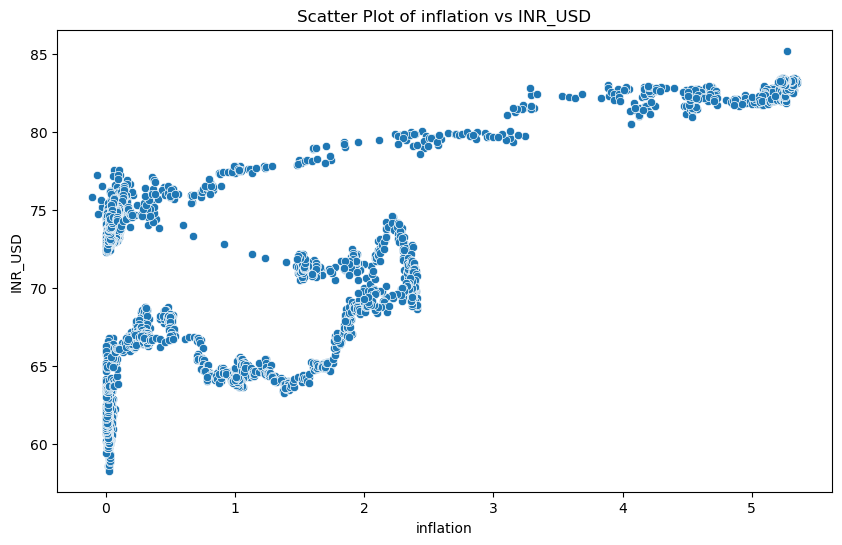

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=merged_data[feature], y=merged_data[target])
    plt.title(f'Scatter Plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))


Mean Squared Error: 0.44425254468248115
     Feature  Importance
0       gold    0.710756
2  inflation    0.265568
1  crude_oil    0.023676


In [216]:
from sklearn.linear_model import LinearRegression

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get feature coefficients
coefficients = linear_model.coef_
feature_coefficients = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(feature_coefficients.sort_values(by='Coefficient', ascending=False))

     Feature  Coefficient
2  inflation     1.797846
0       gold     0.016044
1  crude_oil    -0.046462


In [217]:
print(merged_data.head())
print(merged_data.info())

         Date   AUD_USD   EUR_USD   NZD_USD   GBP_USD  BRL_USD  CAD_USD  \
0  2014-01-02  0.889205  1.376671  0.820883  1.658072   2.3571  1.06445   
1  2014-01-03  0.890631  1.366662  0.818733  1.644791   2.3847  1.06691   
2  2014-01-06  0.896539  1.359601  0.826720  1.641309   2.3715  1.06305   
3  2014-01-07  0.896700  1.363196  0.828981  1.641794   2.3737  1.06609   
4  2014-01-08  0.891742  1.361637  0.828226  1.640016   2.3687  1.07730   

   CNY_USD  HKD_USD    INR_USD  ...  MYR_USD  NOK_USD  SEK_USD     LKR_USD  \
0   6.0440  7.75408  61.840000  ...   3.2893  6.06453  6.42900  130.725006   
1   6.0407  7.75342  62.060001  ...   3.2808  6.16883  6.52080  130.570007   
2   6.0415  7.75393  62.230000  ...   3.2840  6.14827  6.51870  130.625000   
3   6.0427  7.75404  62.310001  ...   3.2835  6.16626  6.50826  130.630005   
4   6.0412  7.75387  62.080002  ...   3.2833  6.16623  6.51380  130.570007   

   CHF_USD    TWD_USD    THB_USD         gold  crude_oil  inflation  
0  0.89150

In [218]:
missing_values = merged_data.isnull().sum()
print(missing_values)

Date         0
AUD_USD      0
EUR_USD      0
NZD_USD      0
GBP_USD      0
BRL_USD      0
CAD_USD      0
CNY_USD      1
HKD_USD      0
INR_USD      0
KRW_USD      0
MXN_USD      0
ZAR_USD      1
SGD_USD      0
DKK_USD      0
JPY_USD      0
MYR_USD      1
NOK_USD      0
SEK_USD      0
LKR_USD      0
CHF_USD      0
TWD_USD      0
THB_USD      0
gold         0
crude_oil    0
inflation    0
dtype: int64


In [219]:
print(merged_data.describe())

           AUD_USD      EUR_USD      NZD_USD      GBP_USD      BRL_USD  \
count  2510.000000  2510.000000  2510.000000  2510.000000  2510.000000   
mean      0.741053     1.143840     0.689840     1.357700     4.066502   
std       0.068882     0.081607     0.063305     0.135134     1.027516   
min       0.574290     0.959619     0.557240     1.072754     2.181300   
25%       0.695905     1.092043     0.648517     1.261201     3.233100   
50%       0.731750     1.126634     0.682703     1.314535     3.895350   
75%       0.768132     1.180046     0.719628     1.416250     5.115475   
max       0.949217     1.393088     0.882379     1.716090     5.886400   

           CAD_USD      CNY_USD      HKD_USD      INR_USD      KRW_USD  ...  \
count  2510.000000  2509.000000  2510.000000  2510.000000  2510.000000  ...   
mean      1.287338     6.649301     7.791984    70.574064  1165.391836  ...   
std       0.074966     0.325247     0.038196     6.643334    84.102333  ...   
min       1.06305

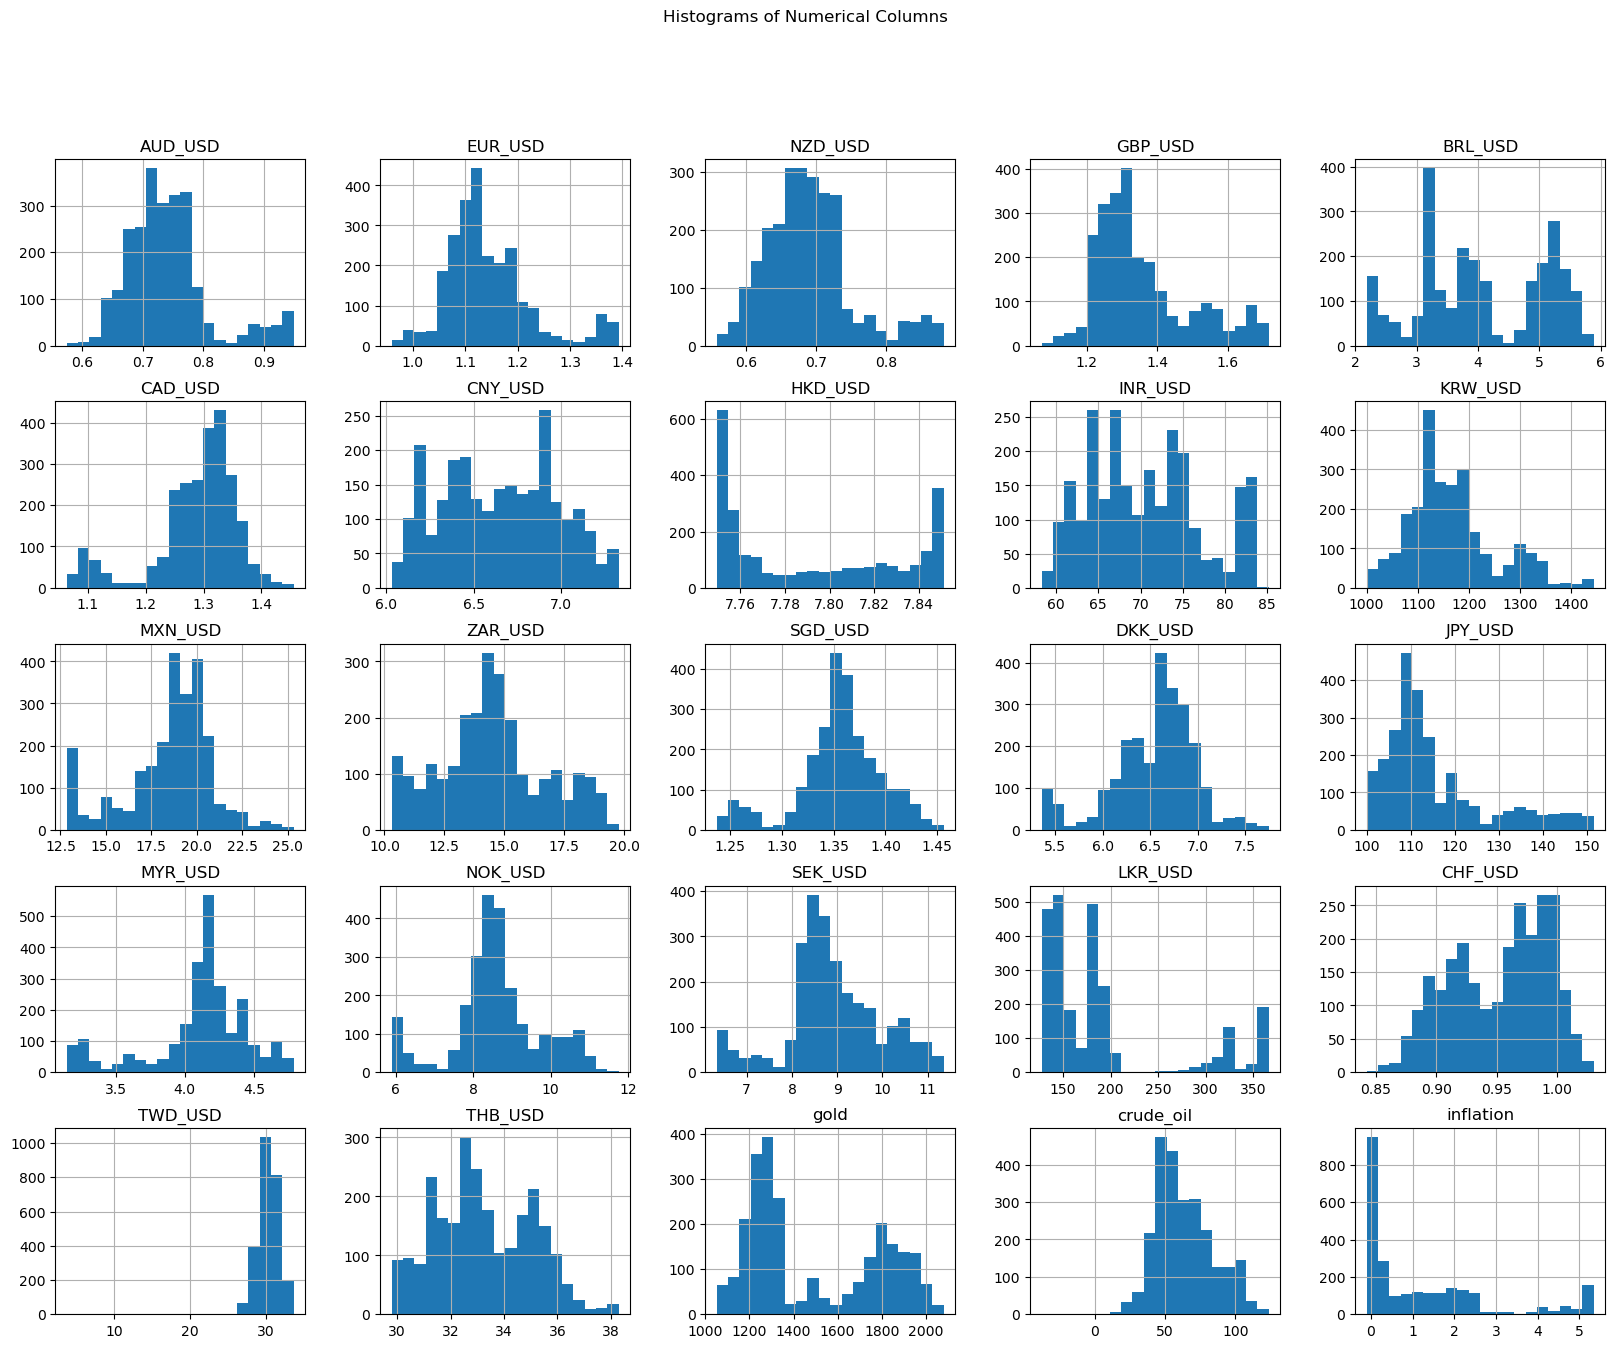

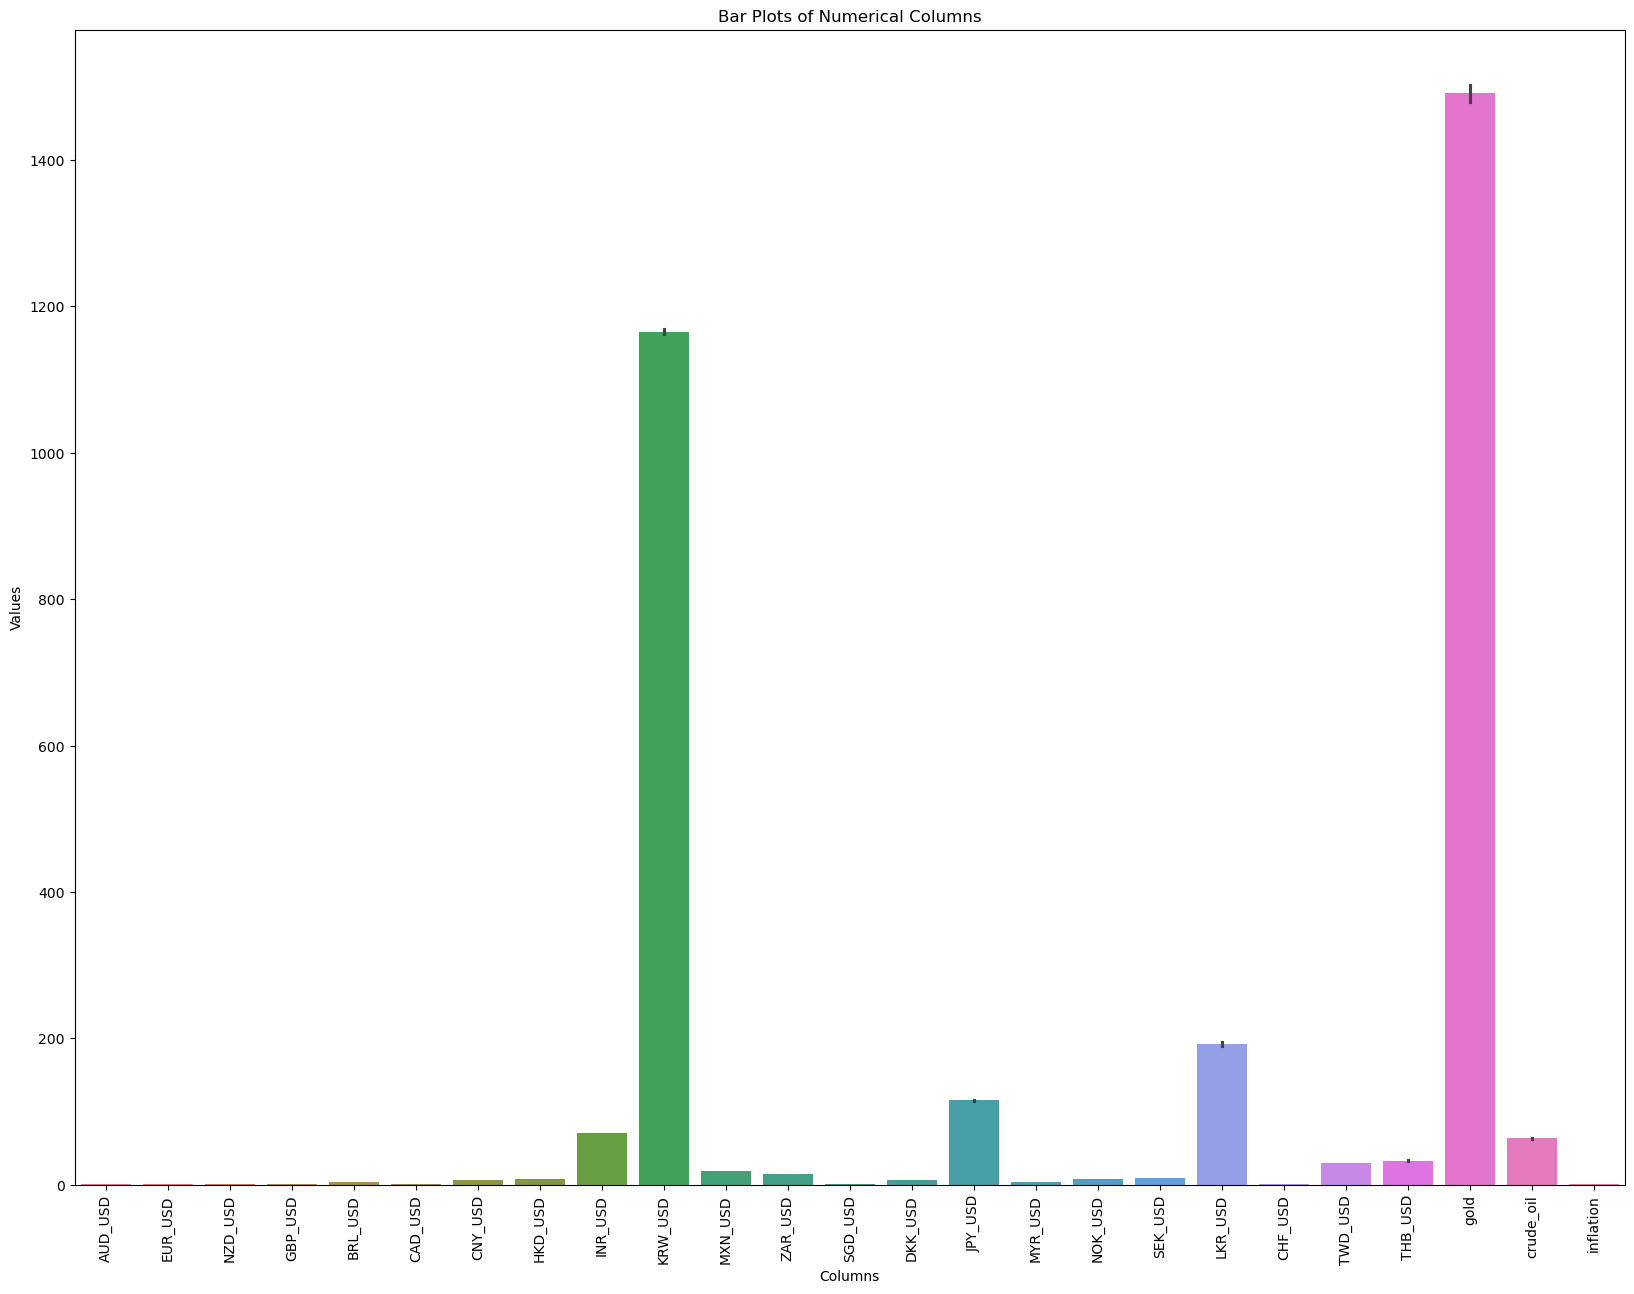

In [220]:
merged_data.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Columns')
plt.show()
# Plot box plots
plt.figure(figsize=(20, 15))
sns.barplot(data=merged_data)
plt.title('Bar Plots of Numerical Columns')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [221]:
# Check value counts for categorical columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(merged_data[column].value_counts())

Date
2014-01-02    1
2020-09-08    1
2020-08-27    1
2020-08-28    1
2020-08-31    1
             ..
2017-05-03    1
2017-05-04    1
2017-05-05    1
2017-05-08    1
2023-12-29    1
Name: count, Length: 2510, dtype: int64


In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import deque
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time
import math

In [253]:

merged_data = pd.read_csv("C:/Users/krake/OneDrive/Documents/rakesh profile/cleaned_data_zscore.csv")

merged_data.dropna(subset=['INR_USD', 'gold', 'crude_oil', 'inflation'], inplace=True)

features = ['gold', 'crude_oil', 'inflation']
target = 'INR_USD'



In [254]:
# Scale data
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
scaled_data = merged_data.copy()
scaled_data[features] = scaler_features.fit_transform(merged_data[features])
scaled_data[target] = scaler_target.fit_transform(merged_data[[target]])

In [255]:
# Create sequences for LSTM
def create_sequences(data, target, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = target[i + sequence_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)


In [256]:
sequence_length = 30
X, y = create_sequences(scaled_data[features].values, scaled_data[target].values, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [257]:

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    return model


In [258]:
input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = build_lstm_model(input_shape)

C:\Users\krake\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [259]:
# Train LSTM model
start_time_train_lstm = time.perf_counter_ns()
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)
end_time_train_lstm = time.perf_counter_ns()
print(f"LSTM Training Time: {(end_time_train_lstm - start_time_train_lstm)} nanoseconds")

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1243 - val_loss: 0.0140
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - val_loss: 0.0065
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_

In [260]:
# Predict using LSTM model
start_time_pred_lstm = time.perf_counter_ns()
y_pred_lstm = lstm_model.predict(X_test)
end_time_pred_lstm = time.perf_counter_ns()
print(f"LSTM Prediction Time: {(end_time_pred_lstm - start_time_pred_lstm)} nanoseconds")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
LSTM Prediction Time: 549711000 nanoseconds


In [261]:
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm)
y_test = scaler_target.inverse_transform(y_test.reshape(-1, 1))

In [262]:
# Calculate performance metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)

In [263]:
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"LSTM Mean Absolute Error: {mae_lstm}")

LSTM Mean Squared Error: 0.48244336590782333
LSTM Mean Absolute Error: 0.5220255507636316


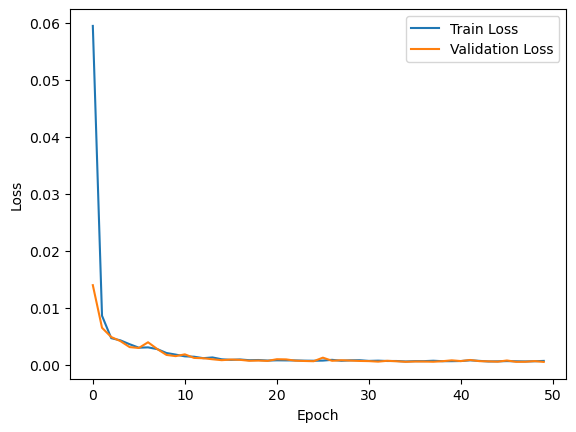

In [264]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

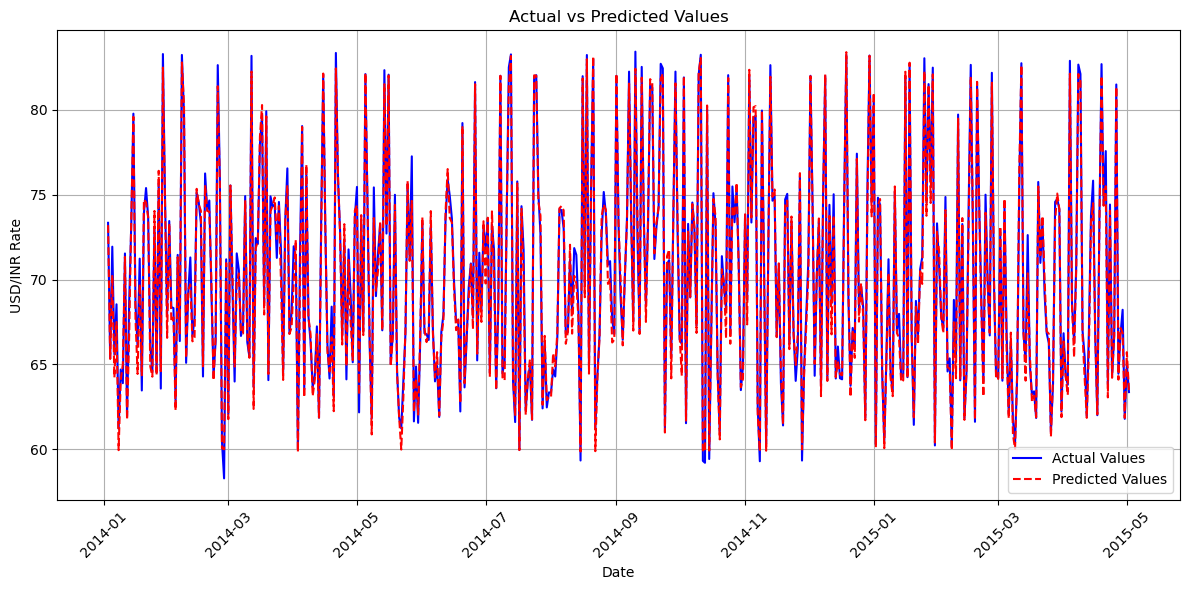

In [265]:

import pandas as pd
import matplotlib.pyplot as plt

# Ensure `dates` is a continuous range with no gaps
dates = pd.date_range(start='2014-01-03', periods=len(y_test), freq='D')  

# Make sure `y_test` and `y_pred` are of the same length as `dates`
assert len(dates) == len(y_test) == len(y_pred_lstm), "Mismatch in lengths of dates, y_test, and y_pred."

# Plot predictions vs. actual values with dates
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label='Actual Values', color='blue')
plt.plot(dates, y_pred_lstm, label='Predicted Values', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('USD/INR Rate')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# Rotate and format x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit date labels

plt.show()


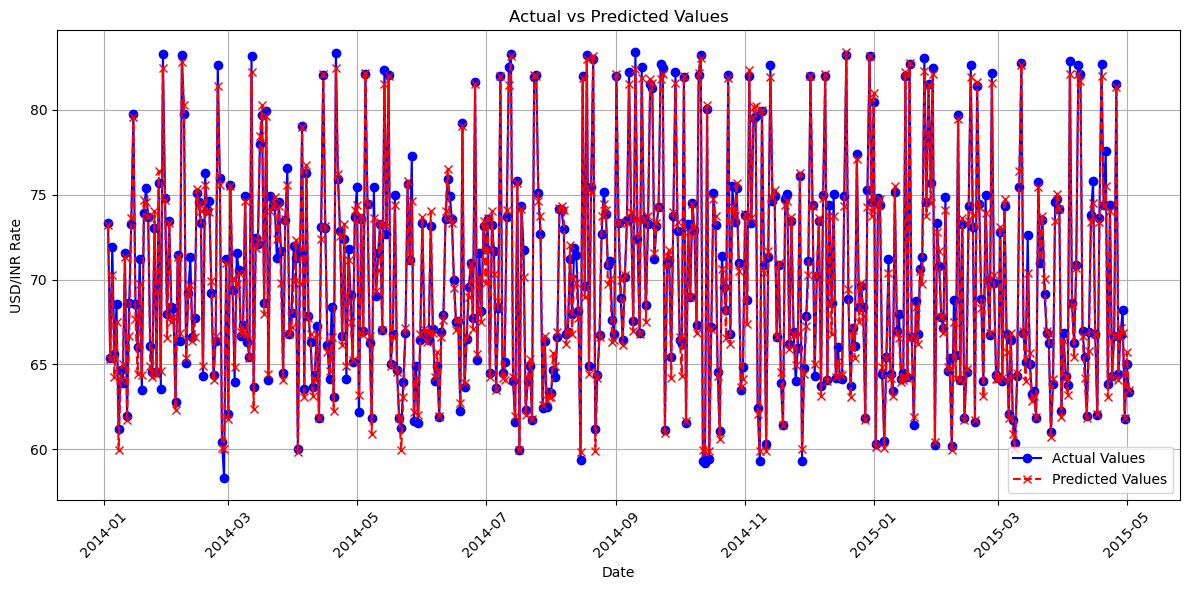

In [266]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dates and values (ensure these are set correctly)
dates = pd.date_range(start='2014-01-03', periods=len(y_test), freq='D')  

# Plot predictions vs. actual values with dates
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(y_test)], y_test, label='Actual Values', marker='o', color='blue')
plt.plot(dates[:len(y_pred_lstm)], y_pred_lstm, label='Predicted Values', marker='x', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('USD/INR Rate')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit date labels
plt.show()


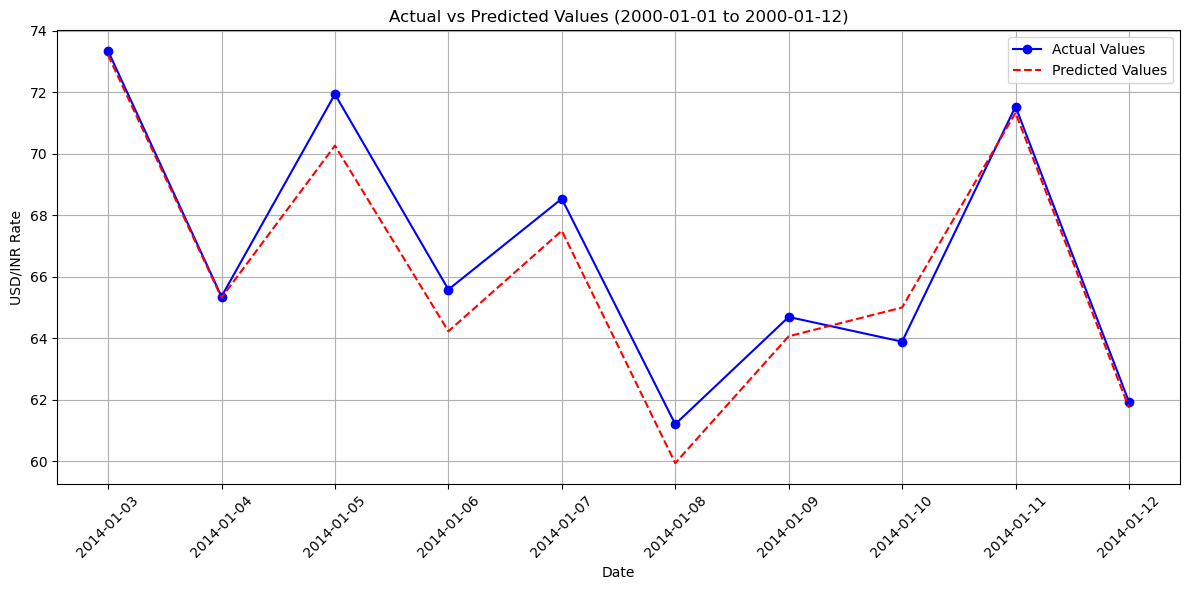

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure all arrays are 1-dimensional
dates = np.ravel(dates)
y_test = np.ravel(y_test)
y_pred_lstm = np.ravel(y_pred_lstm)

# Create a DataFrame to handle the data with possible gaps
results = pd.DataFrame({
    'Date': pd.to_datetime(dates),
    'Actual': y_test,
    'Predicted': y_pred_lstm
})

# Set the Date column as the index
results.set_index('Date', inplace=True)

# Filter the DataFrame for the desired date range
start_date = '2014-01-01'
end_date = '2014-01-12'
filtered_results = results.loc[start_date:end_date]

# Plot predictions vs. actual values for the specific date range
plt.figure(figsize=(12, 6))
plt.plot(filtered_results.index, filtered_results['Actual'], label='Actual Values', color='blue', marker='o')
plt.plot(filtered_results.index, filtered_results['Predicted'], label='Predicted Values', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('USD/INR Rate')
plt.title('Actual vs Predicted Values (2000-01-01 to 2000-01-12)')
plt.legend()
plt.grid(True)

# Rotate and format x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit date labels

plt.show()


Correlation Matrix:
            AUD_USD   EUR_USD   NZD_USD   GBP_USD   BRL_USD   CAD_USD  \
AUD_USD    1.000000  0.823572  0.969600  0.790764 -0.694091 -0.897407   
EUR_USD    0.823572  1.000000  0.811442  0.717590 -0.438079 -0.803501   
NZD_USD    0.969600  0.811442  1.000000  0.762637 -0.688451 -0.862516   
GBP_USD    0.790764  0.717590  0.762637  1.000000 -0.592802 -0.770866   
BRL_USD   -0.694091 -0.438079 -0.688451 -0.592802  1.000000  0.510933   
CAD_USD   -0.897407 -0.803501 -0.862516 -0.770866  0.510933  1.000000   
CNY_USD   -0.762750 -0.610047 -0.745772 -0.837539  0.451810  0.743473   
HKD_USD   -0.429738 -0.311777 -0.462731 -0.550476  0.224117  0.316860   
INR_USD   -0.760550 -0.546817 -0.771740 -0.702235  0.870979  0.554150   
KRW_USD   -0.788363 -0.737099 -0.821199 -0.656461  0.659069  0.621969   
MXN_USD   -0.664541 -0.495697 -0.616821 -0.773977  0.713952  0.667443   
ZAR_USD   -0.837650 -0.636926 -0.850907 -0.713162  0.815382  0.717531   
SGD_USD   -0.707913 -0.800782 -

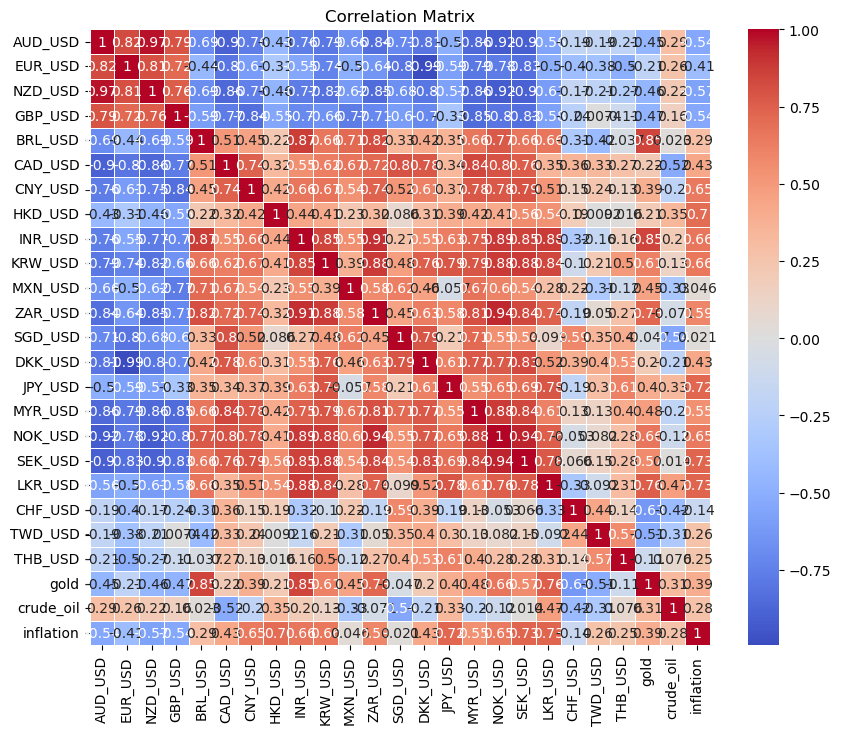

In [268]:
# Correlation matrix
correlation_matrix = merged_data.drop(columns=['Date']).corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [269]:
# Define DQN agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = self._build_model()
        
    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_shape=(self.state_size,), activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
        return model
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])
    
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.max(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def calculate_metrics(self, y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        rmse = math.sqrt(mse)
        return mse, mae, rmse



In [270]:
# Initialize DQN agent
state_size = X_train.shape[1] * X_train.shape[2]  # Flatten the input shape
action_size = 1  
agent = DQNAgent(state_size, action_size)



C:\Users\krake\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [271]:
# Prepare dates for plotting
dates = pd.date_range(start='2014-01-01', periods=len(y_test), freq='D')  # Adjust as needed



In [272]:
# Train DQN agent
episodes = 2 
batch_size = 16



In [273]:
start_time_train_dqn = time.perf_counter_ns()
for e in range(episodes):
    state = np.reshape(X_train[np.random.randint(0, len(X_train))], (1, state_size))
    actual_values = []
    predicted_values = []
    
    for time_step in range(10):  # Reduced time steps for quick verification
        action = agent.act(state)
        next_state = np.reshape(X_train[time_step + 1], (1, state_size))
        
        # Predict next_state using the LSTM
        next_state_lstm = np.reshape(next_state, (1, X_train.shape[1], X_train.shape[2]))
        predicted_next_state = lstm_model.predict(next_state_lstm)
        predicted_next_state = scaler_target.inverse_transform(predicted_next_state.reshape(-1, 1)).flatten()
        
        # Calculate reward
        actual_next_value = scaler_target.inverse_transform(np.array([y_train[time_step + 1]]).reshape(-1, 1)).flatten()
        reward = -np.abs(predicted_next_state - actual_next_value)  # Example reward

        # Store actual and predicted values for metric calculation
        actual_values.append(actual_next_value[0])
        predicted_values.append(predicted_next_state[0])
        
        done = False  # Define termination condition if needed
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
    
    mse, mae, rmse = agent.calculate_metrics(np.array(actual_values), np.array(predicted_values))
    print(f"Episode {e + 1}/{episodes} - Epsilon: {agent.epsilon} - MSE: {mse:.4f} - MAE: {mae:.4f} - RMSE: {rmse:.4f}")

    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Episode 1/2 - Epsilon: 1.0 - MSE: 0.3734 - MAE: 0.4622 - RMSE: 0.6111
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\krake\AppData\Local\Temp\ipykernel_16344\653460353.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][action] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

C:\Users\krake\AppData\Local\Temp\ipykernel_16344\653460353.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][action] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

C:\Users\krake\AppData\Local\Temp\ipykernel_16344\653460353.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][action] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

C:\Users\krake\AppData\Local\Temp\ipykernel_16344\653460353.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target_f[0][action] = target


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

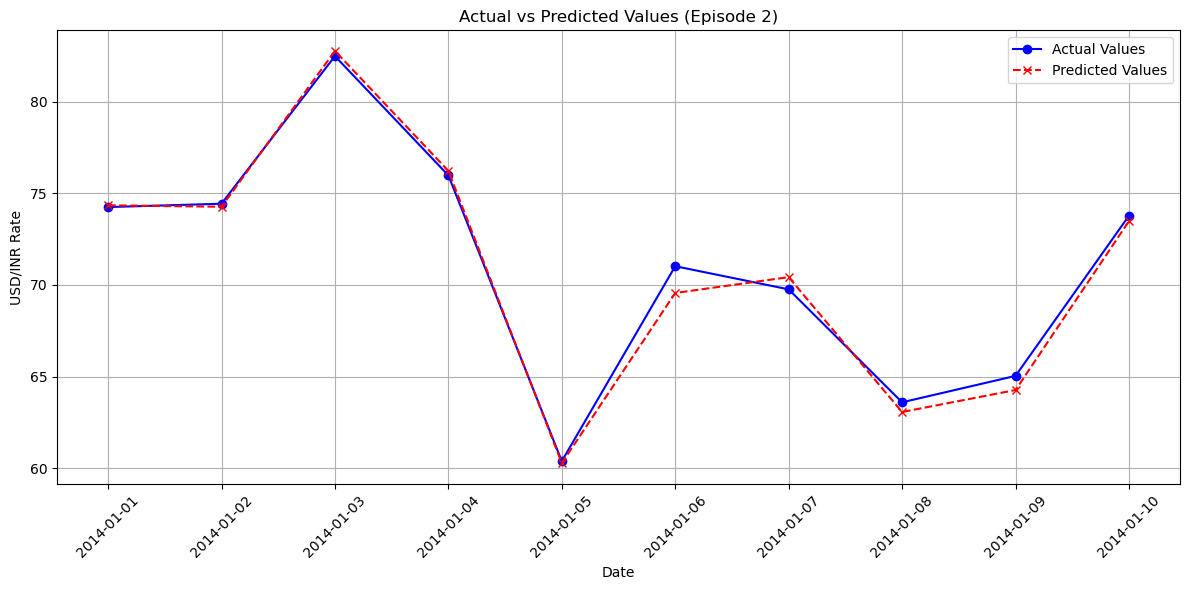

In [274]:
# Plot predictions vs. actual values with dates
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(actual_values)], actual_values, label='Actual Values', marker='o', color='blue')
plt.plot(dates[:len(predicted_values)], predicted_values, label='Predicted Values', marker='x', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('USD/INR Rate')
plt.legend()
plt.title(f'Actual vs Predicted Values (Episode {e + 1})')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit date labels
plt.show()

In [275]:
end_time_train_dqn = time.perf_counter_ns()
print(f"DQN+lstm  Training Time: {(end_time_train_dqn - start_time_train_dqn)} nanoseconds")

DQN+lstm  Training Time: 20407925600 nanoseconds


In [276]:
# Calculate and plot time taken for DQN prediction
start_time_pred_dqn = time.perf_counter_ns()
# DQN doesn't directly predict values like LSTM, it typically interacts with the environment. 
# Here, we simulate prediction by assuming actions influence predictions indirectly.
# Placeholder for DQN prediction example (in reality, you would use DQN to interact with the environment and not directly predict values)
end_time_pred_dqn = time.perf_counter_ns()
print(f"DQN + lstm Prediction Time: {(end_time_pred_dqn - start_time_pred_dqn)} nanoseconds")

DQN + lstm Prediction Time: 36900 nanoseconds


In [277]:
# Example of correlation plot
actual_values = np.random.randn(100)  # 100 continuous values
predicted_values = actual_values + np.random.normal(0, 0.1, 100)  # Add some noise

Correlation: 0.9945


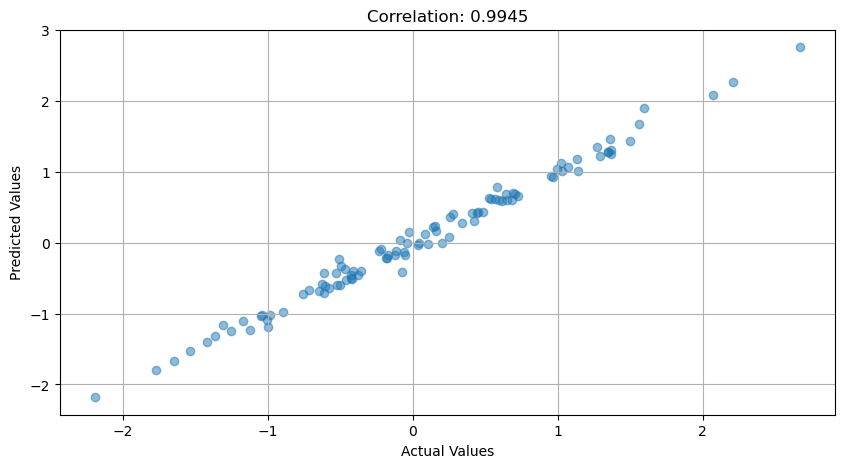

In [278]:

# Calculate correlation
correlation = np.corrcoef(actual_values, predicted_values)[0, 1]
print(f'Correlation: {correlation:.4f}')

# Plot correlation
plt.figure(figsize=(10, 5))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Correlation: {correlation:.4f}')
plt.grid()
plt.show()

Autocorrelation values for first 10 lags:
[0.04783678278150859, -0.06171272822503037, -0.026888533235028957, -0.024015875843348067, -0.03443966138583292, 0.01701950466179016, 0.07506904663547703, 0.004235933550119198, -0.02828184731964924, 0.06684563718462848]


<Figure size 1000x500 with 0 Axes>

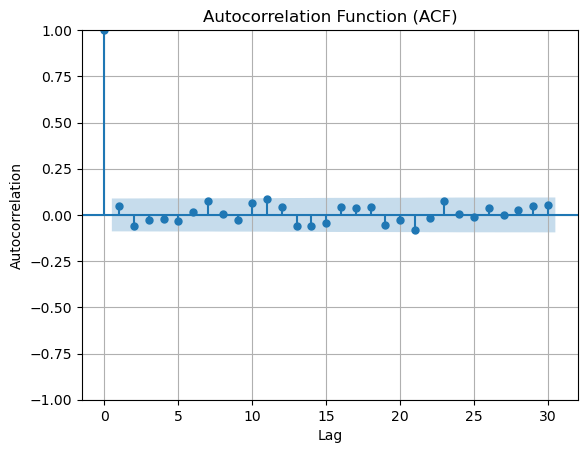

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming y_test contains the actual values and is a time series
y_test_series = pd.Series(y_test.flatten())  # Flatten if needed


autocorr_values = [y_test_series.autocorr(lag=i) for i in range(1, 11)]
print("Autocorrelation values for first 10 lags:")
print(autocorr_values)

# Plot autocorrelation function
plt.figure(figsize=(10, 5))
plot_acf(y_test_series, lags=30)  # Adjust lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid()
plt.show()

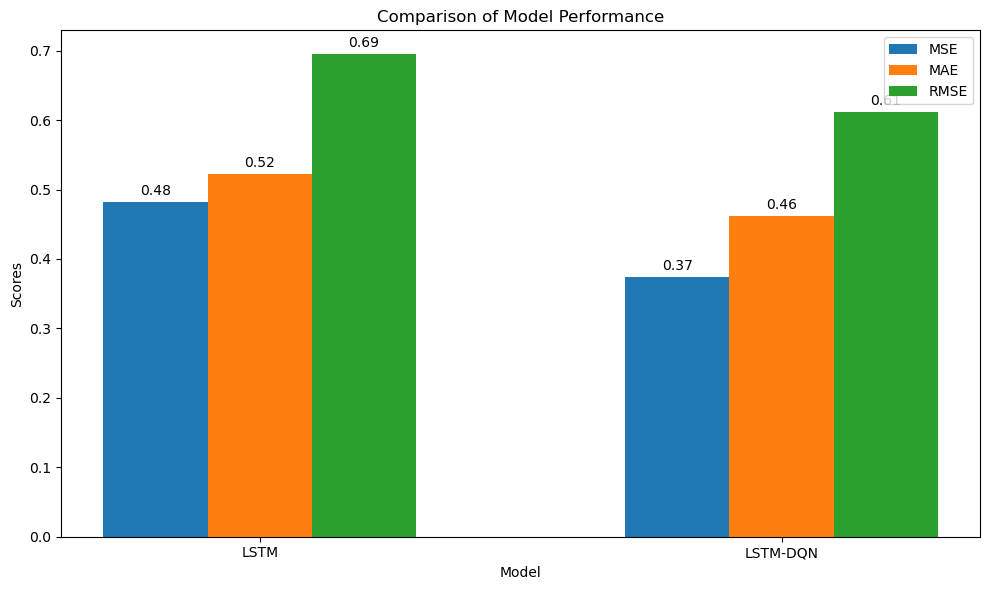

In [281]:
import matplotlib.pyplot as plt

mse_lstm = 0.48244
mae_lstm =  0.5220
rmse_lstm = np.sqrt(mse_lstm)  

mse_combined = 0.3734
mae_combined = 0.4622
rmse_combined = np.sqrt(mse_combined)  


labels = ['LSTM', 'LSTM-DQN']
mse_values = [mse_lstm, mse_combined]
mae_values = [mae_lstm, mae_combined]
rmse_values = [rmse_lstm, rmse_combined]

x = np.arange(len(labels))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, mse_values, width, label='MSE')
bars2 = ax.bar(x, mae_values, width, label='MAE')
bars3 = ax.bar(x + width, rmse_values, width, label='RMSE')


ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

fig.tight_layout()
plt.show()